In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('C:\\Users\\tanis\\Downloads\\Iris.csv')

In [4]:
df = data.copy()

In [5]:
df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
setosa=df.iloc[:50]
versicolor = df.iloc[50:100]
virginica = df.iloc[100:150]

In [9]:
setosa.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [10]:
versicolor.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [11]:
virginica.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualization

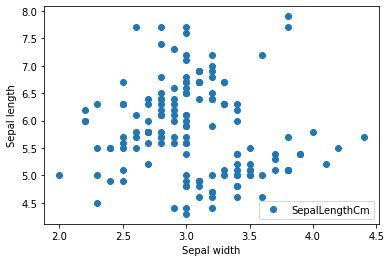

In [13]:
df.plot(x='SepalWidthCm',y='SepalLengthCm',style = 'o')
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.show()

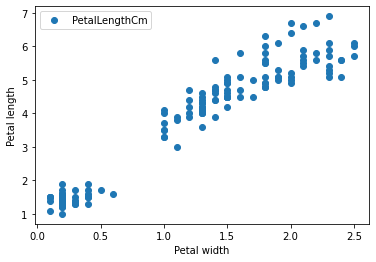

In [14]:
df.plot(x='PetalWidthCm',y='PetalLengthCm',style = 'o')
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.show()

# Elbow method to find number of clusters

In [15]:
from sklearn.cluster import KMeans

In [16]:
krange = range(1,11)
sse = []
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df[['SepalWidthCm','SepalLengthCm']])
    sse.append(km.inertia_)

C:\Users\tanis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


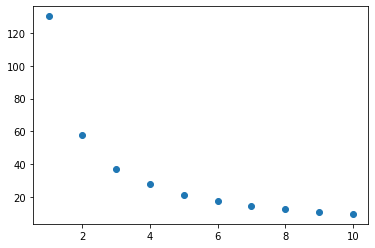

In [17]:
sse
plt.scatter(krange,sse)

From this we get to know that 4 is a good cluster for sepal width and sepal length

In [18]:
rrange = range(1,11)
ssse = []
for k in rrange:
    kkm=KMeans(n_clusters=k)
    kkm.fit(df[['PetalWidthCm','PetalLengthCm']])
    ssse.append(kkm.inertia_)

C:\Users\tanis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


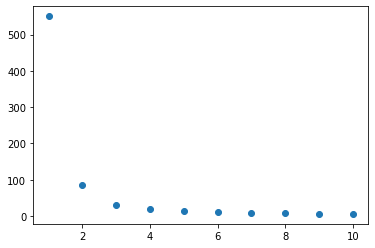

In [19]:
ssse
plt.scatter(rrange,ssse)

3 is the optimal number of clusters for the petal length and width

# Finding the best fit for Sepal

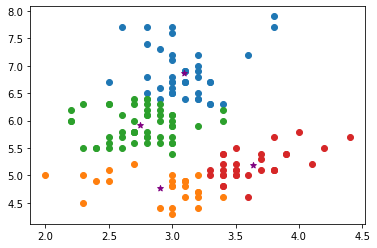

In [20]:
km=KMeans(n_clusters=4)
y_pred = km.fit_predict(df[['SepalWidthCm','SepalLengthCm']])
df['cluster'] = y_pred
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
plt.scatter(df1.SepalWidthCm,df1.SepalLengthCm)
plt.scatter(df2.SepalWidthCm,df2.SepalLengthCm)
plt.scatter(df3.SepalWidthCm,df3.SepalLengthCm)
plt.scatter(df4.SepalWidthCm,df4.SepalLengthCm)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

# K means clustering for Petal

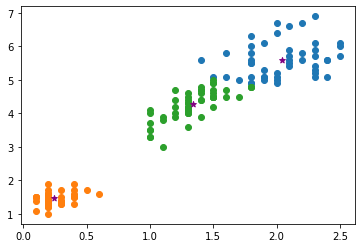

In [21]:
km=KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['PetalWidthCm','PetalLengthCm']])
df['cluster'] = y_pred
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
plt.scatter(df1.PetalWidthCm,df1.PetalLengthCm)
plt.scatter(df2.PetalWidthCm,df2.PetalLengthCm)
plt.scatter(df3.PetalWidthCm,df3.PetalLengthCm)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

From the above results we get to know that viriginica's sepal and petal length are more than versicolor. Versicolor sepal and petal legth are greater than setosa. By using the K-means clustering technique, we can see that the optimum number of clusters required is 3 for sepals and 4 for petals. 